In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Frequency Domain High-Pass Filters
def ideal_high_pass(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    mask = np.ones((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            if np.sqrt((u-crow)**2 + (v-ccol)**2) <= cutoff:
                mask[u, v] = 0
    return mask

def butterworth_high_pass(shape, cutoff, order=2):
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u-crow)**2 + (v-ccol)**2)
            if D == 0:
                mask[u,v] = 0
            else:
                mask[u, v] = 1 / (1 + (cutoff/D)**(2*order))
    return mask

def gaussian_high_pass(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            D2 = (u-crow)**2 + (v-ccol)**2
            mask[u, v] = 1 - np.exp(-D2 / (2*(cutoff**2)))
    return mask

In [3]:
# Apply Filter
def apply_filter(img, mask):
    # DFT
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Apply mask
    dft_shift[:,:,0] *= mask
    dft_shift[:,:,1] *= mask

    # Inverse DFT
    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    return img_back


In [5]:
# Main Program

# Load and resize image
img = cv2.imread("sample.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

cutoff = 30  # cutoff frequency

# Generate filters
ihpf = ideal_high_pass(img.shape, cutoff)
bhpf = butterworth_high_pass(img.shape, cutoff, order=2)
ghpf = gaussian_high_pass(img.shape, cutoff)

# Apply filters
ihpf_img = apply_filter(img, ihpf)
bhpf_img = apply_filter(img, bhpf)
ghpf_img = apply_filter(img, ghpf)


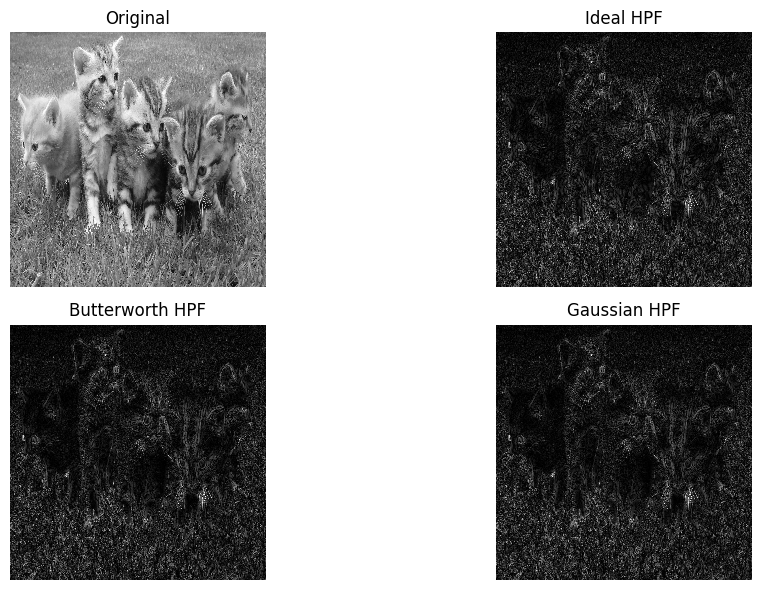

In [6]:
# Display Results
titles = ["Original", "Ideal HPF", "Butterworth HPF", "Gaussian HPF"]
images = [img, ihpf_img, bhpf_img, ghpf_img]

plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
